[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NU-MSE-LECTURES/465_Computational_Microscopy_2026/blob/dev/Week_01/assignments/assignment_01_setup.ipynb)

# Assignment 1: Environment Setup and Python Basics
**Due Date:** January 12, 2026

## Instructions
1.  Complete the tasks in the cells below.
2.  Ensure all code runs without errors.
3.  Submit your completed notebook via Canvas (or GitHub if instructed).

In [1]:
from statistics import stdev

# Colab setup
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab. Installing requirements...")
    !pip install hyperspy ase py4DSTEM
    !git clone https://github.com/NU-MSE-LECTURES/465_Computational_Microscopy_2026.git
    print("Setup complete.")
except ImportError:
    IN_COLAB = False
    print("Not running in Google Colab.")

Not running in Google Colab.


## Task 1: Environment Verification

Write a Python script to:
1.  Import `sys`, `numpy`, and `matplotlib`.
2.  Print the Python version.
3.  Print the versions of `numpy` and `matplotlib`.

In [1]:
# Your code here
import sys
import numpy as np
import matplotlib

print(f"Python version: {sys.version}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")

Python version: 3.13.11 | packaged by Anaconda, Inc. | (main, Dec 10 2025, 21:21:08) [Clang 20.1.8 ]
NumPy version: 2.4.1
Matplotlib version: 3.10.8


## Task 2: Automate Project Structure

Write a Python script using `os` or `pathlib` to programmatically create the following directory structure inside a folder named `assignment_01_output`:
```
assignment_01_output/
├── data/
│   ├── raw/
│   └── processed/
├── figures/
└── src/
```

In [2]:
# Your code here
import os

base_dir = "assignment_01_output"
subdirs = [
    "data/raw",
    "data/processed",
    "figures",
    "src"
]

for subdir in subdirs:
    path = os.path.join(base_dir, subdir)
    os.makedirs(path, exist_ok=True)
    print(f"Created directory: {path}")

Created directory: assignment_01_output/data/raw
Created directory: assignment_01_output/data/processed
Created directory: assignment_01_output/figures
Created directory: assignment_01_output/src


## Task 3: Ensure Reproducibility

Demonstrate reproducibility by:
1.  Setting a random seed using `numpy.random.seed()`.
2.  Generating an array of 5 random numbers.
3.  Printing the array.
4.  Run the cell multiple times to verify that the numbers remain the same.

In [11]:
# Your code here
import numpy as np

# Set the seed
np.random.seed(42)

# Generate random numbers
random_numbers = np.random.rand(5)
print(f"Random numbers: {random_numbers}")

Random numbers: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


In [38]:
#hyperspy not working
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import hyperspy.api as hs
import py4DSTEM as p4d

import hyperspy.api as hs
from pathlib import Path

import shutil
from pathlib import Path

# Define source and destination folders
source_folder = Path("/Users/ginocangialosi/Documents/MSE 465/MATSCI465_GinoCangialosi/Week_01/assignments/raw_data")
destination_folder = Path("/Users/ginocangialosi/Documents/MSE 465/MATSCI465_GinoCangialosi/Week_01/assignments/assignment_01_output/data/raw")

# Create destination folder if it doesn't exist
destination_folder.mkdir(parents=True, exist_ok=True)

# Loop through all TIFF files and copy them
for file_path in source_folder.glob("*.tif"):
    shutil.copy(file_path, destination_folder / file_path.name)
    print(f"Copied {file_path.name} to {destination_folder}")

s = hs.load("/Users/ginocangialosi/Documents/MSE 465/MATSCI465_GinoCangialosi/Week_01/assignments/assignment_01_output/data/raw/example_EM_Image.tif")


data = s.data
print(type(data))  # <class 'numpy.ndarray'>
print(data.shape)  # e.g., (512, 512)
s.plot()  # Interactive plot window




Copied example_EM_Image.tif to /Users/ginocangialosi/Documents/MSE 465/MATSCI465_GinoCangialosi/Week_01/assignments/assignment_01_output/data/raw
ERROR | Hyperspy | If this file format is supported, please report this error to the RosettaSciIO developers at https://github.com/hyperspy/rosettasciio/issues (hyperspy.io:600)


ValueError: <COMPRESSION.LZW: 5> requires the 'imagecodecs' package

In [25]:
import os

print(os.getcwd())  # shows where Python is looking
print(os.listdir()) # lists files in the folder



/Users/ginocangialosi/Documents/MSE 465/MATSCI465_GinoCangialosi/Week_01/assignments
['assignment_01_output', 'raw_data', 'assignment_01_setup.ipynb']


59.01474651099368 0 254 67.2195350017706
<class 'numpy.ndarray'>
(503, 503, 3)


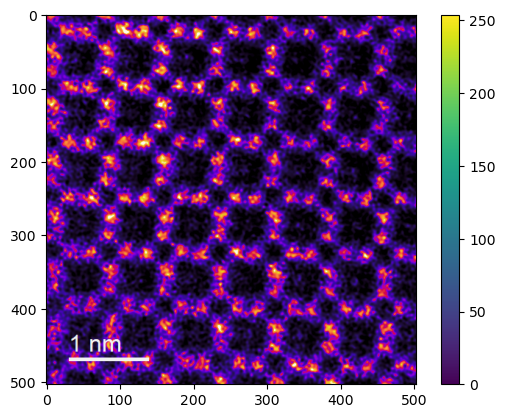

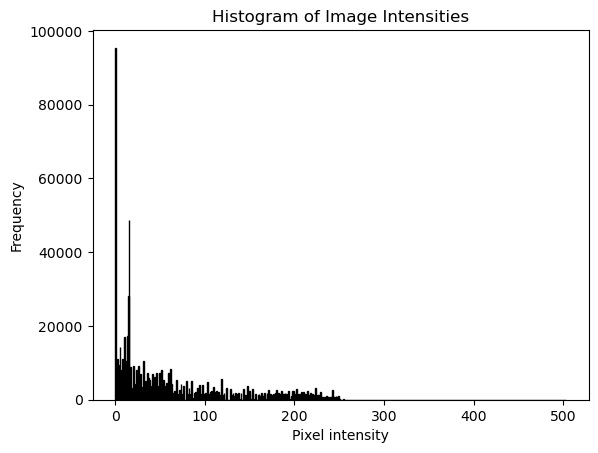

In [39]:
#Working Assignment 1 Using matplotlib
import matplotlib.pyplot as plt
import os

# Load image
img = plt.imread("/Users/ginocangialosi/Documents/MSE 465/MATSCI465_GinoCangialosi/Week_01/assignments/assignment_01_output/data/raw/example_EM_Image.tif")

img = plt.imread("/Users/ginocangialosi/Documents/MSE 465/MATSCI465_GinoCangialosi/Week_01/assignments/assignment_01_output/data/raw/example_EM_Image.tif")
img_array = np.array(img)

mean = np.mean(img_array)
min = np.amin(img_array)
max = np.amax(img_array)
stdev = np.std(img_array)
print(mean, min, max, stdev)

print(type(img_array))
print(img_array.shape)



# Display
plt.imshow(img)
plt.colorbar()
plt.savefig(os.path.join("/Users/ginocangialosi/Documents/MSE 465/MATSCI465_GinoCangialosi/Week_01/assignments/assignment_01_output/data/processed", "Matplot_view_example_EM_Image.tif"))
plt.show()
#Image is visualized in RGB, it has 3 channels of colors

pixels = img_array.flatten()

# Plot histogram
plt.hist(pixels, bins=503, range=(0, 503), color='gray', edgecolor='black')
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Image Intensities')
plt.savefig(os.path.join("/Users/ginocangialosi/Documents/MSE 465/MATSCI465_GinoCangialosi/Week_01/assignments/assignment_01_output/data/processed", "histogram_example_EM_Image.tif"))
plt.show()
#Histogram of pixel intensity vs frequency is made




